In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rc
from scipy.signal import find_peaks 
from cProfile import label

In [13]:
uvvis_path = "functional_uvvis.CSV"
uvvis=pd.read_csv(uvvis_path, sep = ';', decimal = ',')

peak_path = "functional_peak.CSV"
peak=pd.read_csv(peak_path, sep = ';', decimal = ',')

uvvis_water_path = "functional_uvvis_water.CSV"
uvvis_water=pd.read_csv(uvvis_water_path, sep = ';', decimal = ',')

peak_water_path = "functional_peak_water.CSV"
peak_water=pd.read_csv(peak_water_path, sep = ';', decimal = ',')

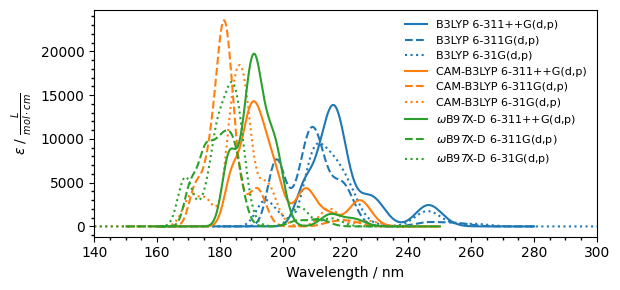

In [14]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = uvvis, x = 'X b3lyp6311++', y = 'Y b3lyp6311++', label = 'B3LYP 6-311++G(d,p)', color = 'tab:blue') 
sns.lineplot(data = uvvis, x = 'X b3lyp6311', y = 'Y b3lyp6311', label = 'B3LYP 6-311G(d,p)', color = 'tab:blue', linestyle = '--') 
sns.lineplot(data = uvvis, x = 'X b3lyp631', y = 'Y b3lyp631', label = 'B3LYP 6-31G(d,p)', color = 'tab:blue', linestyle = ':') 
sns.lineplot(data = uvvis, x = 'X c-b6311++', y = 'Y c-b6311++', label = 'CAM-B3LYP 6-311++G(d,p)', color = 'tab:orange') 
sns.lineplot(data = uvvis, x = 'X c-b6311', y = 'Y c-b6311', label = 'CAM-B3LYP 6-311G(d,p)', color = 'tab:orange', linestyle = '--')
sns.lineplot(data = uvvis, x = 'X c-b631', y = 'Y c-b631', label = 'CAM-B3LYP 6-31G(d,p)', color = 'tab:orange', linestyle = 'dotted') 
sns.lineplot(data = uvvis, x = 'X wb6311++', y = 'Y wb6311++', label = r'$\omega$B97X-D 6-311++G(d,p)', color = 'tab:green') 
sns.lineplot(data = uvvis, x = 'X wb6311', y = 'Y wb6311', label = r'$\omega$B97X-D 6-311G(d,p)', color = 'tab:green', linestyle = '--')  
sns.lineplot(data = uvvis, x = 'X wb631', y = 'Y wb631', label = r'$\omega$B97X-D 6-31G(d,p)', color = 'tab:green', linestyle = 'dotted')

ax.set_xlabel('Wavelength / nm')
ax.set_ylabel(r'$\epsilon$ / $\frac{L}{mol \cdot cm}$')
# ax.set_ylim(-0.01, 0.35)
ax.set_xlim(140, 300)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)

# handles, labels = ax.get_legend_handles_labels()
plt.legend(frameon = False, fontsize = 8)
# rcParams['legend.columnspacing']=1
plt.tight_layout()
plt.savefig('vacuum_full.png', dpi=150)
plt.show()

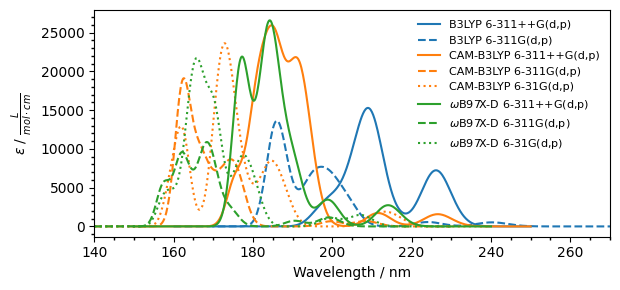

In [16]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = uvvis_water, x = 'X b3lyp6311++', y = 'Y b3lyp6311++', label = 'B3LYP 6-311++G(d,p)', color = 'tab:blue') 
sns.lineplot(data = uvvis_water, x = 'X b3lyp6311', y = 'Y b3lyp6311', label = 'B3LYP 6-311G(d,p)', color = 'tab:blue', linestyle = '--') 
# sns.lineplot(data = uvvis_water, x = 'X b3lyp631', y = 'Y b3lyp631', label = 'B3LYP 6-31G(d,p)', color = 'tab:blue', linestyle = ':') 
sns.lineplot(data = uvvis_water, x = 'X c-b6311++', y = 'Y c-b6311++', label = 'CAM-B3LYP 6-311++G(d,p)', color = 'tab:orange') 
sns.lineplot(data = uvvis_water, x = 'X c-b6311', y = 'Y c-b6311', label = 'CAM-B3LYP 6-311G(d,p)', color = 'tab:orange', linestyle = '--')
sns.lineplot(data = uvvis_water, x = 'X c-b631', y = 'Y c-b631', label = 'CAM-B3LYP 6-31G(d,p)', color = 'tab:orange', linestyle = 'dotted') 
sns.lineplot(data = uvvis_water, x = 'X wb6311++', y = 'Y wb6311++', label = r'$\omega$B97X-D 6-311++G(d,p)', color = 'tab:green') 
sns.lineplot(data = uvvis_water, x = 'X wb6311', y = 'Y wb6311', label = r'$\omega$B97X-D 6-311G(d,p)', color = 'tab:green', linestyle = '--')  
sns.lineplot(data = uvvis_water, x = 'X wb631', y = 'Y wb631', label = r'$\omega$B97X-D 6-31G(d,p)', color = 'tab:green', linestyle = 'dotted')

ax.set_xlabel('Wavelength / nm')
ax.set_ylabel(r'$\epsilon$ / $\frac{L}{mol \cdot cm}$')
# ax.set_ylim(-0.01, 0.35)
ax.set_xlim(140, 270)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)

# handles, labels = ax.get_legend_handles_labels()
plt.legend(frameon = False, fontsize = 8)
# rcParams['legend.columnspacing']=1
plt.tight_layout()
plt.savefig('water_full.png', dpi=150)
plt.show()

In [8]:
def make_subplot_functional(axes, dataname, xdataname,  ydataname, displaylabel, color, linestyle, scilimit, ncols, bbox2anchor):
    ax = axes
    sns.lineplot(data = dataname, x = xdataname, y = ydataname, ax = ax, label = displaylabel, color = color, linestyle = linestyle)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimit)
    ax.yaxis.offsetText.set_fontsize(9)
    # ax.legend(frameon = False, fontsize = 8)
    ax.legend(frameon = False, ncol=ncols, loc = 4, bbox_to_anchor = bbox2anchor, fontsize = 8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

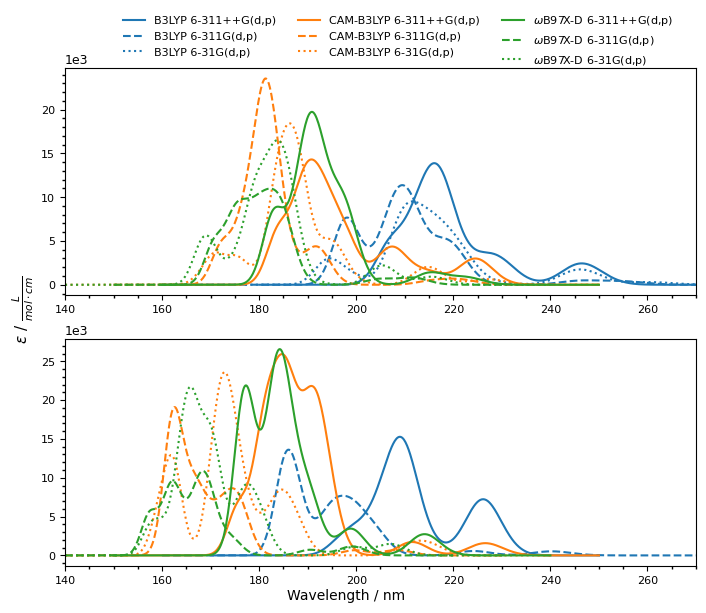

In [24]:
fig, axes = plt.subplots(2,1, figsize=(7,6))

make_subplot_functional(axes[0], uvvis, 'X b3lyp6311++', 'Y b3lyp6311++', 'B3LYP 6-311++G(d,p)', 'tab:blue', '-', (3,3), 3, (0.98,0.96))
make_subplot_functional(axes[0], uvvis, 'X b3lyp6311', 'Y b3lyp6311', 'B3LYP 6-311G(d,p)', 'tab:blue', '--', (3,3), 3, (0.98,0.96))
make_subplot_functional(axes[0], uvvis, 'X b3lyp631', 'Y b3lyp631', 'B3LYP 6-31G(d,p)', 'tab:blue', ':', (3,3), 3, (0.98,0.96))
make_subplot_functional(axes[0], uvvis, 'X c-b6311++', 'Y c-b6311++', 'CAM-B3LYP 6-311++G(d,p)', 'tab:orange', '-', (3,3), 3, (0.98,0.96))
make_subplot_functional(axes[0], uvvis, 'X c-b6311', 'Y c-b6311', 'CAM-B3LYP 6-311G(d,p)', 'tab:orange', '--', (3,3), 3, (0.98,0.96))
make_subplot_functional(axes[0], uvvis, 'X c-b631', 'Y c-b631', 'CAM-B3LYP 6-31G(d,p)', 'tab:orange', ':', (3,3), 3, (0.98,0.96))
make_subplot_functional(axes[0], uvvis, 'X wb6311++', 'Y wb6311++', r'$\omega$B97X-D 6-311++G(d,p)', 'tab:green', '-', (3,3), 3, (0.98,0.96))
make_subplot_functional(axes[0], uvvis, 'X wb6311', 'Y wb6311', r'$\omega$B97X-D 6-311G(d,p)', 'tab:green', '--', (3,3), 3, (0.98,0.96))
make_subplot_functional(axes[0], uvvis, 'X wb631', 'Y wb631', r'$\omega$B97X-D 6-31G(d,p)', 'tab:green', ':', (3,3), 3, (0.98,0.96))

make_subplot_functional(axes[1], uvvis_water, 'X b3lyp6311++', 'Y b3lyp6311++', None, 'tab:blue', '-', (3,3), 1, (1,1))
make_subplot_functional(axes[1], uvvis_water, 'X b3lyp6311', 'Y b3lyp6311', None, 'tab:blue', '--', (3,3), 1, (1,1))
# make_subplot_functional(axes[1], uvvis_water, 'X b3lyp631', 'Y b3lyp631', None, 'tab:blue', ':', (3,3), 1, (1,1))
make_subplot_functional(axes[1], uvvis_water, 'X c-b6311++', 'Y c-b6311++', None, 'tab:orange', '-', (3,3), 1, (1,1))
make_subplot_functional(axes[1], uvvis_water, 'X c-b6311', 'Y c-b6311', None, 'tab:orange', '--', (3,3), 1, (1,1))
make_subplot_functional(axes[1], uvvis_water, 'X c-b631', 'Y c-b631', None, 'tab:orange', ':', (3,3), 1, (1,1))
make_subplot_functional(axes[1], uvvis_water, 'X wb6311++', 'Y wb6311++', None, 'tab:green', '-', (3,3), 1, (1,1))
make_subplot_functional(axes[1], uvvis_water, 'X wb6311', 'Y wb6311', None, 'tab:green', '--', (3,3), 1, (1,1))
make_subplot_functional(axes[1], uvvis_water, 'X wb631', 'Y wb631', None, 'tab:green', ':', (3,3), 1, (1,1))

axes[0].set_ylabel(" ", fontsize = 10)
axes[0].set_xlabel(" ", fontsize = 2)
axes[1].set_ylabel(" ", fontsize = 10)
axes[1].set_xlabel(" ", fontsize = 2)
axes[0].set_xlim(140, 270)
axes[1].set_xlim(140, 270)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel(r'$\epsilon$ / $\frac{L}{mol\cdot cm}$', fontsize = 11)
fig.tight_layout(pad=0)
plt.savefig('functional_full.png', dpi=150)
plt.show()